# Introduction to R Part 13: Initial Data Exploration and Preparation

The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data youself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simplier ones about the form on quality of data. That said, it is important to go into your initial data exloration with a big picture question in mind since the goal of your analysis should inform how you prepare the data. 

This lesson aims to raise some of the questions you should consider when you look at a new data set for the first time and show how to perform various R operations related to those questions. We are going to cover a lot of ground in this lesson, touching briefly on many topics from data cleaning to graphing to feature engineering. We will cover many of these topics in future lessons in greater detail. 

In this lesson we will explore the Titanic disaster training set. This is a data set consisting of 889 passengers who rode aboard the Titanic available from Kaggle.com, a website dedicated to data science competitions and education. You need to create a Kaggle account and accept the rules for the Titanic competition to download the data set.

### Exploring The Variables

The first step in exploratory analysis is reading in the data and then exploring the varaibles. It is important to get a sense of how many varaibles and cases there are, the data types of the variables and the range of values they take on.

We'll start by changing our working directory and reading in the data:

In [1]:
setwd("C:/Users/Greg/Desktop/Kaggle/titanic")      

titanic_train <- read.csv("titanic_train.csv")

When working in RStudio, data you load will appear in the environment pane in the upper right corner. It should show the name of the data frame you used to store the data as well as the number of rows (obs) and columns (variables.). Clicking the arrow next to the name of the data frame will show more about the data frame's stucture including the variable names, data types and the first few values for each variable.

Since RStudio automatically shows us the structure of the data, using the str() function is somewhat redundant, but it is always there if you need it:

In [2]:
str(titanic_train)    

'data.frame':	889 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 889 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 558 519 628 416 580 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 680 levels "110152","110413",..: 523 596 669 49 472 275 85 395 344 132 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 146 levels "","A10","A14",..: 1 82 1 56 1 1 130 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


After determining the data's dimensions and basic data types, it is a good idea look at a summary of the data:

In [3]:
summary(titanic_train)

  PassengerId     Survived          Pclass     
 Min.   :  1   Min.   :0.0000   Min.   :1.000  
 1st Qu.:224   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446   Median :0.0000   Median :3.000  
 Mean   :446   Mean   :0.3825   Mean   :2.312  
 3rd Qu.:668   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891   Max.   :1.0000   Max.   :3.000  
                                               
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:312   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.00  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.64  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :883                NA's   :177    
     SibSp            Pa

Summary gives a concise overview of each variable including basic summary statistics for numeric variables. Summary does not, however, necessarily give us enough information to determine what each varaible means. Certain variables like "Age" and "Fare" are self-explanitory, while others like "SibSp" and "Parch" are not. Whoever collects or provides data for download should also provide a list of variable descriptions. In this case, Kaggle provides a list of descriptions on the data download page:

In [4]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

After looking at the data for the first time, you should ask yourself a few questions:

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there NA values, outliers or other strange values?
4. Are there new variables I should create?

For the rest of this lesson we will address each of these questions in the context of this data set. 

### Do I Need All of The Variables?

Getting rid of unnecessary variables is a good first step when dealing with any data set, since dropping variables reduces complexity and can make computation on the data faster. Whether you should get rid of a variable or not will depend on size of the data set and the goal of your analysis. With a data set as small as the Titanic data, there's no real need to drop variables from a computing perspective (we have plenty of memory and processing power to deal with such a small data set) but it can still be helpful to drop variables that will only distract from your goal. 

This data set is provided in conjunction with a predictive modeling where the goal is to use the training data to predict whether passengers of the titanic listed in a second data set survived or not. We won't be dealing with the second data set (known the test set) right now, but we will revisit these this competition and make predictions in a future lesson on predictive modeling.

Let's go through each variable and consider whether we should keep it or not in the context of predicting survival:

"PassengerId" is just a number assigned to each passenger. It is nothing more than an arbitrary identifier; we could keep it for identification purposes, but lets remove it anyway

In [5]:
titanic_train$PassengerId  <- NULL             #remove PassengerId

"Survived" indicates whether each passenger lived or died. Since predicting survival is our goal, we definitly need to keep it.

Features that describe passengers numerically or group them into a few broad categories could be useful for predicting survival. The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked are either numeric or factors with only a handful of categories. Let's keep all of those variables.

We have 3 more features to consider: Name, Ticket and Cabin.

"Name" appears to be a character string of the name of each passenger encoded as a factor. Lets look at name a little closer:

In [6]:
print( head( sort(titanic_train$Name), 15) )  #sort() returns the names in sorted order

 [1] Abbing, Mr. Anthony                           
 [2] Abbott, Mr. Rossmore Edward                   
 [3] Abbott, Mrs. Stanton (Rosa Hunt)              
 [4] Abelson, Mr. Samuel                           
 [5] Abelson, Mrs. Samuel (Hannah Wizosky)         
 [6] Adahl, Mr. Mauritz Nils Martin                
 [7] Adams, Mr. John                               
 [8] Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
 [9] Aks, Mrs. Sam (Leah Rosen)                    
[10] Albimona, Mr. Nassef Cassem                   
[11] Alexander, Mr. William                        
[12] Alhomaki, Mr. Ilmari Rudolf                   
[13] Ali, Mr. Ahmed                                
[14] Ali, Mr. William                              
[15] Allen, Miss. Elisabeth Walton                 
889 Levels: Abbing, Mr. Anthony ... Zimmerman, Mr. Leo


Since the Name factor has 889 levels and there are 889 rows in the data set we know each name is unique. It appears that married women have thier maiden names listed in parentheses. In general, a variable that is unique to each case isn't useful for prediction. We could extract last names to try to group family members together, but even then the number of categories would be very large. In addition, the Parch and SibSp variables already contain some information about family relationships, so from the perspective of predictive modeling, the Name variable could be removed. On the other hand, it can be nice to have some way to uniquely identify particular cases and names are interesting from a personal and historical perspective, so lets keep Name, knowing that we won't actually use it in any predictive models we make.

Next, lets look closer at "Ticket":

In [7]:
print( head( titanic_train$Ticket,25 ) )

 [1] A/5 21171        PC 17599         STON/O2. 3101282 113803          
 [5] 373450           330877           17463            349909          
 [9] 347742           237736           PP 9549          113783          
[13] A/5. 2151        347082           350406           248706          
[17] 382652           244373           345763           2649            
[21] 239865           248698           330923           113788          
[25] 349909          
680 Levels: 110152 110413 110465 110564 110813 111240 111320 111361 ... WE/P 5735


Ticket has 680 levels: almost as many levels as there are passengers. Factors with almost as many levels as there are records are generally not very useful for prediction. We could try to reduce the number of levels by grouping certain tickets together, but the ticket numbers don't appear to follow any logical pattern we could use for grouping. Let's remove it:

In [8]:
titanic_train$Ticket  <- NULL

Finally lets consider the "Cabin" variable:

In [9]:
print( head( titanic_train$Cabin,25 ) )

 [1]      C85       C123           E46                 G6   C103               
[16]                               D56       A6       
146 Levels:  A10 A14 A16 A19 A20 A23 A24 A26 A31 A32 A34 A36 A5 A6 A7 ... G6


Cabin also has quite a few unique values with 146 levels, which indicates it may not be particularly useful for prediction. On the other hand, the names of the levels for the cabin variable seem to have a fairly regular structure: each starts with a capital letter followed by a number. We could use that stucture to reduce the number of levels to make categories large enough that they might be useful for prediction. Lets Keep Cabin for now.

As you might have noticed, removing variables is often more of an art than a science. It is easiest to start simple: don't be afraid to remove (or simply ignore) confusing, messy or otherwise troublesome variables temporarily when you're just getting starting with an analysis or predictive modeling task. Data projects are iterative processes: you can start with a simple analysis or model using only a few variables and then expand later by adding more and more of the other variables you intitially ignored or removed.

### Should I Transform Any Variables?

When you first load a data set, some of the variables may be encoded as data types that don't fit well with what the data really is or what it means. For instance, when we loaded the Titanic data, we did not include the stringsAsFactors = FALSE argument, so all the character variables were turned into factors. After inspecting the data, Sex, Cabin, Embarked and Ticket all appear to be categorical variables that were appropriately turned into factors. Names, however, are a unique identifiers, not categories, so it doesn't really make sense to encode Name as a factor.

Lets turn Name back into a character:

In [10]:
titanic_train$Name <- as.character(titanic_train$Name)

Now let's inspect the Survived variable using the table function:

In [11]:
table( titanic_train$Survived )            #Create a table of counts


  0   1 
549 340 

Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively. Variables that indicate a state or the presense or absense of something with the numbers 0 and 1 are sometimes called indicator variables or dummy variables (0 indicates absence and 1 indicates presence.). Indicator variables are essentailly just a shorthand for encoding a categorical variable with 2 levels. We could instead encode Surived as a factor and give each level names that are more informative than 0 and 1:

In [12]:
new_survived <- factor(titanic_train$Survived)
levels(new_survived) <- c("Died","Survived")

table(new_survived)

new_survived
    Died Survived 
     549      340 

Survived looks a little nicer as factor with appropriate level names, but even so, we're not going to change it. Why not? If you remember, our goal with this data set is predicing survival for the Kaggle competition. It turns out that when submitting predictions for the competition, the predictions need to be encoded as 0 or 1. It would only complicate things to transform Survived, only to convert it back to 0 and 1 later. This shows the importance of having a good understanding of the problem you are working on.

There's one more variable that has a questionable data encoding: Pclass. Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric varaible. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by tranforming Pclass into an ordered factor:

In [13]:
titanic_train$Pclass <- ordered(titanic_train$Pclass, levels=c("3","2","1"))

table(titanic_train$Pclass)


  3   2   1 
491 184 214 

Now it's time to revisit the Cabin variable. We didn't delete it and it is the proper data type, but it has more levels than we'd like. It appears that each Cabin is in a general section of the ship indicated by the capital letter at the start of each factor level:

In [14]:
levels(titanic_train$Cabin)

[1] ""                "A10"             "A14"             "A16"            
  [5] "A19"             "A20"             "A23"             "A24"            
  [9] "A26"             "A31"             "A32"             "A34"            
 [13] "A36"             "A5"              "A6"              "A7"             
 [17] "B101"            "B102"            "B18"             "B19"            
 [21] "B20"             "B22"             "B3"              "B30"            
 [25] "B35"             "B37"             "B38"             "B39"            
 [29] "B4"              "B41"             "B42"             "B49"            
 [33] "B5"              "B50"             "B51 B53 B55"     "B57 B59 B63 B66"
 [37] "B58 B60"         "B69"             "B71"             "B73"            
 [41] "B77"             "B78"             "B79"             "B80"            
 [45] "B82 B84"         "B86"             "B94"             "B96 B98"        
 [49] "C101"            "C103"            "C104"            "C106"           
 [53] "C110"            "C111"            "C118"            "C123"           
 [57] "C124"            "C125"            "C126"            "C128"           
 [61] "C148"            "C2"              "C22 C26"         "C23 C25 C27"    
 [65] "C30"             "C32"             "C45"             "C46"            
 [69] "C47"             "C49"             "C50"             "C52"            
 [73] "C54"             "C62 C64"         "C65"             "C68"            
 [77] "C7"              "C70"             "C78"             "C82"            
 [81] "C83"             "C85"             "C86"             "C87"            
 [85] "C90"             "C91"             "C92"             "C93"            
 [89] "C95"             "C99"             "D"               "D10 D12"        
 [93] "D11"             "D15"             "D17"             "D19"            
 [97] "D20"             "D21"             "D26"             "D28"            
[101] "D30"             "D33"             "D35"             "D36"            
[105] "D37"             "D45"             "D46"             "D47"            
[109] "D48"             "D49"             "D50"             "D56"            
[113] "D6"              "D7"              "D9"              "E10"            
[117] "E101"            "E12"             "E121"            "E17"            
[121] "E24"             "E25"             "E31"             "E33"            
[125] "E34"             "E36"             "E38"             "E40"            
[129] "E44"             "E46"             "E49"             "E50"            
[133] "E58"             "E63"             "E67"             "E68"            
[137] "E77"             "E8"              "F E69"           "F G63"          
[141] "F G73"           "F2"              "F33"             "F38"            
[145] "F4"              "G6"

If we grouped cabin just by this letter, we could reduce the number of levels while potentially extracting some useful information. Also note the first Cabin level "". Two quotes without a space between them is known as the empty string, which generally indicates a missing character value.

Now lets transform Cabin by the capital letter in the cabin name, keeping the empty string as an extra category:

In [15]:
char_cabin <- as.character(titanic_train$Cabin)     # Convert to character

new_Cabin <- ifelse(char_cabin == "",          # if the value is ""
                    "",                        # keep it
                    substr(char_cabin,1,1))    # else transform it to a substring *

new_Cabin <- factor(new_Cabin )                # convert back to a factor

table( new_Cabin )                             # inspect the result as a table

new_Cabin
      A   B   C   D   E   F   G 
688  15  45  59  33  32  13   4 

*Note: the substr() function takes a character as input and produces a substring as output. Here we are creating substrings from char_cabin, where each substring starts at index 1 and ends at index 1, effectively stripping off the first character.

The table shows we succeeded in condensing Cabin into a handful of broader categories, but we also discovered something interesting: 688 of the records have Cabin equal to the empty string. In other words, more than 2/3 of the passengers don't even have a cabin listed at all! Discovering and deciding how to handle these sorts of pecularities is an important part working with data and there often isn't a single correct answer. 

Since there are so many missing values, the Cabin varaible might be devoid of useful information for prediction. On the other hand, a missing cabin variable could be an indication that a passenger died: after all, how would we know what cabin a passenger stayed in if they weren't around to tell the tale?

Let's keep the new cabin variable:

In [16]:
titanic_train$Cabin <- new_Cabin

This is as far as we'll go with transformations right now, but know that the transformations we've covered here are just the tip of the iceberg. 

### Are there NA Values, Outliers or Other Strange Values?

Data sets are often littered with missing (NA) data, extreme data points called outliers and other strange values. Missing values, outliers and stange values can negatively affect statistical tests and models and may even cause certian functions to fail.

In R, you can detect NA values with the is.na() function:

In [17]:
dummy_vector <- c(1,1,2,3,NA,4,3,NA)

is.na(dummy_vector)                      #check whether values are NA or not

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE

Detecting NA values is the easy part: it is far more difficult to decide how to handle them. In cases where you have a lot of data and only a few NA values, it might make sense to simply delete records with NA values present. On the other hand, if you have more than a handful of NA values, removing records with NA values could cause you to get rid of a lot of data. NA values in factors are not particularly troubling because you can simply treat NA as an additional category. NA values in numeric variables are more troublesome: you can't just treat NA as a number. As it happens, the Titanic dataset has some NA's in the Age variable:

In [18]:
summary( titanic_train$Age )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.00   28.00   29.64   38.00   80.00     177 

With 177 NA values it's probalby not a good idea to throw all those records away. Here are a few ways we could deal with them:

1. Replace the NAs with 0s
2. Replace the NAs with some central value like the mean or median
3. Impute values for the NAs (estimate values using statistical/predictive modeling methods.).
4. Split the data set into two parts: 1 set with where records have an Age value and 1 set where Age is NA.

Setting NA values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero. Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages. For all we know each age is equally common. We can quickly get a sense of the distribution of ages by creating a histogram with the hist() function:

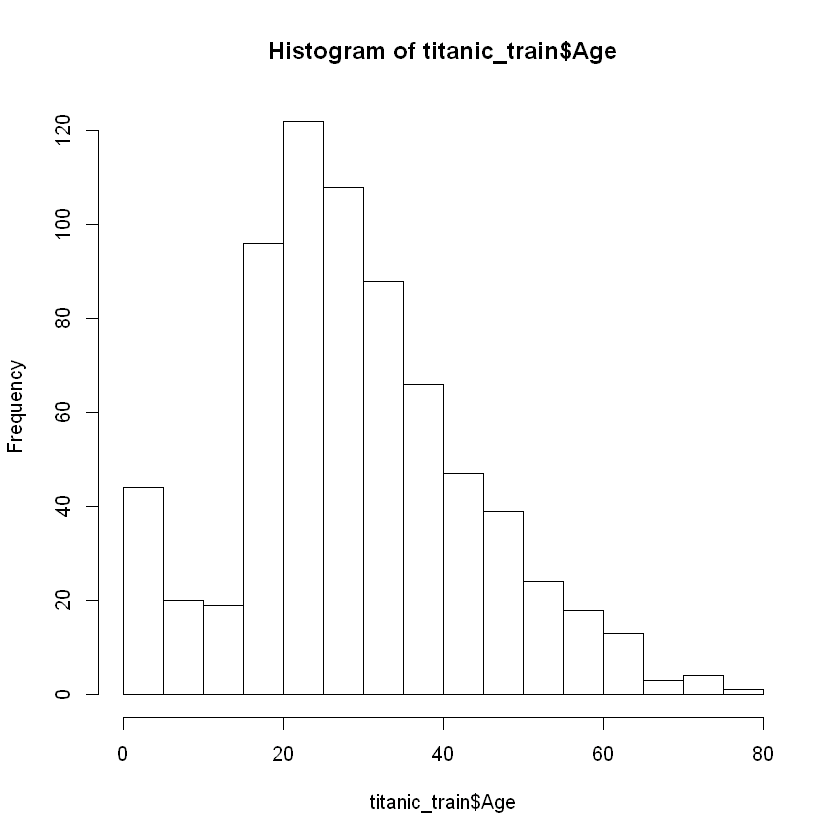

In [19]:
hist( titanic_train$Age, breaks=20)         #Create a histogram of age with 20 bins

From the histogram we see that ages between 20 and 30 are the most common, so filling in NA values with a central number like the mean or median wouldn't be entirely unreasonable. Let's fill in the NA values with the median value of 28:

In [20]:
na_logical <- is.na( titanic_train$Age )    #create a logical variable to flag NA values

new_age_variable <- ifelse(na_logical,          #if NA was found
                           28,                  #change the value to 28
                           titanic_train$Age)   #else keep the old value

titanic_train$Age <- new_age_variable           #change the age variable

summary(titanic_train$Age)                      #check the new variable

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   22.00   28.00   29.32   35.00   80.00 

Since we just added a bunch of 28s to age, lets look at the histogram again for a sanity check. The bar representing 28 to be much taller this time.

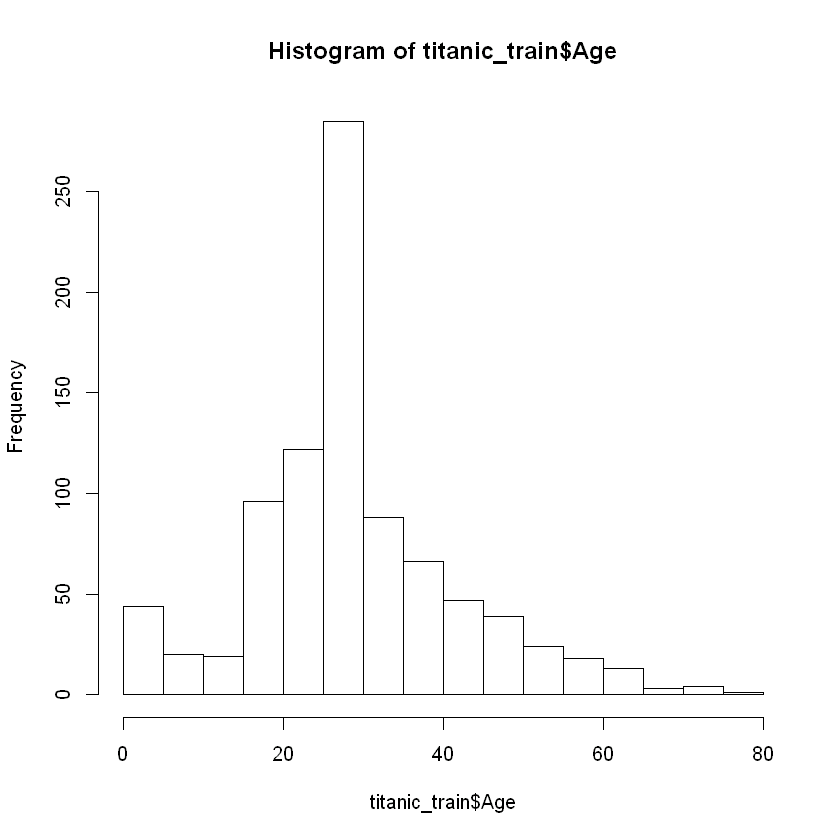

In [21]:
hist( titanic_train$Age, breaks=20) 

Some of the ages we assigned are probably way off, but it might be better than throwing entire records away. In practice, imputing the missing data (estimating age based on other variables) might have been a better option, but we'll stick with this for now.

Next lets consider outliers. Outliers are extreme numerical values: values that lie far away from the typical values a variable takes on. Creating plots is one of the quickest ways to detect outliers. For instance, the histogram above shows that 1 or 2 passengers were near age 80. Ages near 80 are uncommon for this data set, but in looking at the general shape of the data one or two 80 year olds doesn't seem particularly surprising.

Now lets investigate the variable "Fare" variable. This time we'll use a boxplot, since boxplots are designed to show the spread of the data and help help identify outliers:

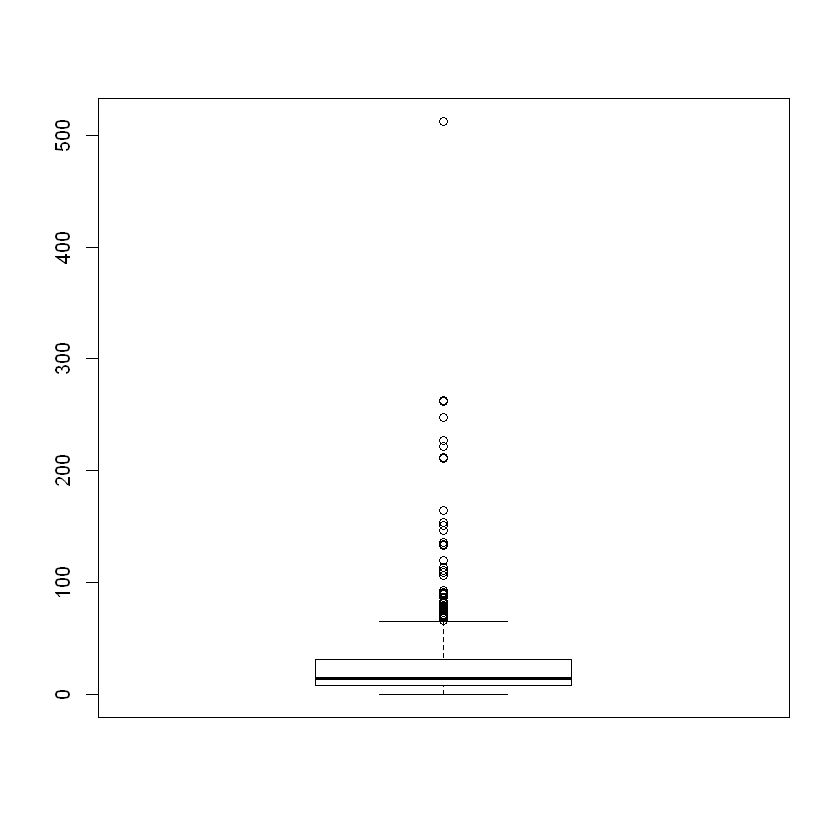

In [22]:
boxplot( titanic_train$Fare )

In a boxplot, the central box represents 50% of the data and the central bar represents the median. The dotted lines with bars on the ends are "whiskers" which encompass the great majority of the data and circles beyond the whiskers indicate uncommon values. In this case, we have some uncommon values that are so far away from the typical value that the box appears squashed in the plot: this is a clear indication of outliers. Indeed, it looks like one passenger paid almost twice as much as any other passenger. Even the passengers that paid bewteen 200 and 300 are far higher than the vast majority of the other passengers.

For interest's sake, lets check the name of this high roller. The function which() takes a logical vector and returns all the indicies for which the logical vector is true. We can use which() to determine which elements of a vector conform to a logical expression. In this case we want to find the index of the person who paid the maximum Fare. It turns out there is an extension of which called which.max() that gets the index of the max value of a vector:

In [23]:
high_roller_index <- which.max( titanic_train$Fare )  #get the index of the max Fare

high_roller_index                                     #check the index

titanic_train[high_roller_index,]                     #use the index to check the record

[1] 258

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35,0,0,512.3292,,C


Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce thier impact. Even if you decide to keep outliers unchanged it is worth identifying them. The more information you have about your data, the better. Lets keep Miss Ward unchanged.

Data sets can have other strange values beyond NA values and outliers that you may need to address.  For example, the large number of empty strings in Cabin variable is an oddity that could undermine its usefulness in prediction. Sometimes data is mislabeled or simply erroneous; bad data can corrupt any sort of analysis so it is important to address these sorts of issues before doing too much work.

### Are There New Variables I Should Create?

The variables present when you load a data set aren't always the most useful variables for analysis. Creating new variables that are derivations or combinations existing ones is a common step to take before jumping into an analysis or modeling task.

For example, imagine you are analyzing web site auctions where one of the data fields is a text description of the item being sold. A raw block of text is difficult to use in any sort of analysis, but you could create new varaibles from it such as a variable storing the length of the description or variables indicating the presence of certain keywords. 

Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Lets create a new variable Family that combines SibSp and Parch to indicate the total number of familiy members (siblings, spouses, parents and children) a passenger has on board:

In [24]:
titanic_train$Family <- titanic_train$SibSp + titanic_train$Parch

For interest's sake, lets find out who had the most family members on board:

In [25]:
most_family <- which( titanic_train$Family == max(titanic_train$Family))

titanic_train[most_family,] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,3,"Sage, Master. Thomas Henry",male,28,8,2,69.55,,S,10
180,0,3,"Sage, Miss. Constance Gladys",female,28,8,2,69.55,,S,10
201,0,3,"Sage, Mr. Frederick",male,28,8,2,69.55,,S,10
324,0,3,"Sage, Mr. George John Jr",male,28,8,2,69.55,,S,10
792,0,3,"Sage, Miss. Stella Anna",female,28,8,2,69.55,,S,10
845,0,3,"Sage, Mr. Douglas Bullen",male,28,8,2,69.55,,S,10
862,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28,8,2,69.55,,S,10


*Note: which.max() only returns a single index (the first max) even if multiple records contain the max value. To find indexes of all the records equal to the max, use which()

There were 7 people on board with 8 siblings/spouses and 2 parents/children--they were probably all siblings (thay also probably had missing Age data, since we see all the Ages are set to 28.). Tragically, all 7 of them passed away. The 8th sibling is likely in the test data for which we are supposed make predictions. Would you predict that the final sibling survived?

### Wrap Up

In this lesson we covered several general questions you should address when you first inspect a data set. Your first goal should be to explore the stucture of the data to clean it and pepare all the variables you want to use. Once your data is it the right form, you can proceed with exploring its meaning.

### Next Time: Introduction to R Part 14: Exploratory Analysis